---
EXPLORATION_BS2
# 8. 영화리뷰 텍스트 감성분석하기
---

---
## 8-11. 프로젝트 : 네이버 영화리뷰 감성분석 도전하기
---

▣ Naver sentiment movie corpus v1.0<br>
https://github.com/e9t/nsmc

### 라이브러리 버전 확인

In [1]:
import pandas
import konlpy
import gensim

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.3
0.5.2
4.1.2


### 1) 데이터 준비와 확인

In [2]:
import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 2) 데이터로더 구성

* 데이터의 중복 제거
* NaN 결측치 제거
* 한국어 토크나이저로 토큰화
* 불용어(Stopwords) 제거
* 사전 word_to_index 구성
* 텍스트 스트링을 사전 인덱스 스트링으로 변환
* X_train, y_train, X_test, y_test, word_to_index 리턴

In [3]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#def load_data(train_data, test_data, num_words=num_words):
    # [[YOUR CODE]]
def load_data(train_data, test_data, num_words=100000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index


X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [4]:
word_to_index

{'<PAD>': 0,
 '<BOS>': 1,
 '<UNK>': 2,
 '<UNUSED>': 3,
 '.': 4,
 '영화': 5,
 '다': 6,
 '고': 7,
 '하': 8,
 '을': 9,
 '보': 10,
 '..': 11,
 '게': 12,
 ',': 13,
 '!': 14,
 '지': 15,
 '있': 16,
 '없': 17,
 '?': 18,
 '좋': 19,
 '나': 20,
 '었': 21,
 '만': 22,
 '는데': 23,
 '너무': 24,
 '봤': 25,
 '적': 26,
 '안': 27,
 '정말': 28,
 '로': 29,
 '음': 30,
 '것': 31,
 '아': 32,
 '네요': 33,
 '재밌': 34,
 '어': 35,
 '같': 36,
 '점': 37,
 '지만': 38,
 '진짜': 39,
 '했': 40,
 '에서': 41,
 '기': 42,
 '네': 43,
 '않': 44,
 '거': 45,
 '았': 46,
 '수': 47,
 '되': 48,
 '면': 49,
 'ㅋㅋ': 50,
 '말': 51,
 '연기': 52,
 '인': 53,
 '주': 54,
 '내': 55,
 '최고': 56,
 '~': 57,
 '평점': 58,
 '이런': 59,
 '던': 60,
 '어요': 61,
 '할': 62,
 '왜': 63,
 '겠': 64,
 '1': 65,
 '스토리': 66,
 '해': 67,
 '습니다': 68,
 'ㅋㅋㅋ': 69,
 '...': 70,
 '드라마': 71,
 '생각': 72,
 '아니': 73,
 '더': 74,
 '그': 75,
 '싶': 76,
 '사람': 77,
 '듯': 78,
 '때': 79,
 '감동': 80,
 '함': 81,
 '배우': 82,
 '본': 83,
 '까지': 84,
 '뭐': 85,
 '알': 86,
 '만들': 87,
 '내용': 88,
 '볼': 89,
 '감독': 90,
 '보다': 91,
 '라': 92,
 '그냥': 93,
 '재미': 94,
 '시

In [5]:
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, '<UNUSED>': 3, '.': 4, '영화': 5, '다': 6, '고': 7, '하': 8, '을': 9, '보': 10, '..': 11, '게': 12, ',': 13, '!': 14, '지': 15, '있': 16, '없': 17, '?': 18, '좋': 19, '나': 20, '었': 21, '만': 22, '는데': 23, '너무': 24, '봤': 25, '적': 26, '안': 27, '정말': 28, '로': 29, '음': 30, '것': 31, '아': 32, '네요': 33, '재밌': 34, '어': 35, '같': 36, '점': 37, '지만': 38, '진짜': 39, '했': 40, '에서': 41, '기': 42, '네': 43, '않': 44, '거': 45, '았': 46, '수': 47, '되': 48, '면': 49, 'ㅋㅋ': 50, '말': 51, '연기': 52, '인': 53, '주': 54, '내': 55, '최고': 56, '~': 57, '평점': 58, '이런': 59, '던': 60, '어요': 61, '할': 62, '왜': 63, '겠': 64, '1': 65, '스토리': 66, '해': 67, '습니다': 68, 'ㅋㅋㅋ': 69, '...': 70, '드라마': 71, '생각': 72, '아니': 73, '더': 74, '그': 75, '싶': 76, '사람': 77, '듯': 78, '때': 79, '감동': 80, '함': 81, '배우': 82, '본': 83, '까지': 84, '뭐': 85, '알': 86, '만들': 87, '내용': 88, '볼': 89, '감독': 90, '보다': 91, '라': 92, '그냥': 93, '재미': 94, '시간': 95, '지루': 96, '중': 97, '재미있': 98, '년': 99, '10': 100, '였': 101, '잼': 102, '사랑': 103, '못': 1

In [6]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [7]:
print(index_to_word[0])
print(index_to_word[1])
print(index_to_word[2])
print(index_to_word[3])
print(index_to_word[4])

<PAD>
<BOS>
<UNK>
<UNUSED>
.


In [8]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

### 3) 모델 구성을 위한 데이터 분석 및 가공

* 데이터셋 내 문장 길이 분포
* 적절한 최대 문장 길이 지정
* keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

In [9]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575가 maxlen 설정값 이내에 포함됩니다. 


In [10]:
import tensorflow as tf
import numpy as np

In [11]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(146182, 41)


### 4) LSTM, CNN, GlobalMaxPooling ...

In [12]:
vocab_size = 30000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 100  # 단어 하나를 표현하는 임베딩 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

### 4-1) LSTM

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(32))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 3,018,113
Trainable params: 3,018,113
Non-trainable params: 0
_________________________________________________________________


In [14]:
x_train

array([[    0,     0,     0, ...,    20,    33,   748],
       [    0,     0,     0, ...,    15,    44,   391],
       [    0,     0,     0, ...,    24,   205, 30113],
       ...,
       [    0,     0,     0, ...,  2710,     6,    18],
       [    0,     0,     0, ...,    60,   395,  8572],
       [    0,     0,     0, ...,    88,  2740,     5]], dtype=int32)

In [15]:
# validation set 10000건 분리
x_val = x_train[:30000]   
y_val = y_train[:30000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[30000:]  
partial_y_train = y_train[30000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(116182, 41)
(116182,)


In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
227/227 [==============================] - 5s 9ms/step - loss: 0.4224 - accuracy: 0.8101 - val_loss: 0.3460 - val_accuracy: 0.8505
Epoch 2/10
227/227 [==============================] - 2s 7ms/step - loss: 0.3043 - accuracy: 0.8725 - val_loss: 0.3395 - val_accuracy: 0.8525
Epoch 3/10
227/227 [==============================] - 2s 7ms/step - loss: 0.2648 - accuracy: 0.8918 - val_loss: 0.3490 - val_accuracy: 0.8518
Epoch 4/10
227/227 [==============================] - 2s 7ms/step - loss: 0.2290 - accuracy: 0.9066 - val_loss: 0.3771 - val_accuracy: 0.8530
Epoch 5/10
227/227 [==============================] - 2s 7ms/step - loss: 0.1971 - accuracy: 0.9197 - val_loss: 0.4030 - val_accuracy: 0.8499
Epoch 6/10
227/227 [==============================] - 2s 7ms/step - loss: 0.1713 - accuracy: 0.9310 - val_loss: 0.4496 - val_accuracy: 0.8477
Epoch 7/10
227/227 [==============================] - 2s 7ms/step - loss: 0.1492 - accuracy: 0.9407 - val_loss: 0.5287 - val_accuracy: 0.8438
Epoch 

In [17]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.6687 - accuracy: 0.8387
[0.6687242984771729, 0.8386801481246948]


In [18]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


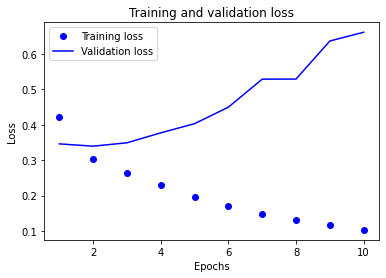

In [19]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

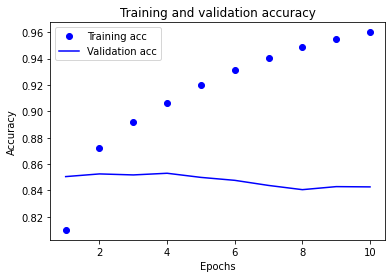

In [20]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 4-2) CNN

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         3000000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          11216     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [22]:
# validation set 10000건 분리
x_val = x_train[:30000]   
y_val = y_train[:30000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[30000:]  
partial_y_train = y_train[30000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(116182, 41)
(116182,)


In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
227/227 [==============================] - 3s 8ms/step - loss: 0.4719 - accuracy: 0.7575 - val_loss: 0.3558 - val_accuracy: 0.8449
Epoch 2/10
227/227 [==============================] - 1s 6ms/step - loss: 0.2938 - accuracy: 0.8783 - val_loss: 0.3324 - val_accuracy: 0.8580
Epoch 3/10
227/227 [==============================] - 1s 6ms/step - loss: 0.2231 - accuracy: 0.9141 - val_loss: 0.3498 - val_accuracy: 0.8558
Epoch 4/10
227/227 [==============================] - 1s 6ms/step - loss: 0.1534 - accuracy: 0.9454 - val_loss: 0.4046 - val_accuracy: 0.8489
Epoch 5/10
227/227 [==============================] - 1s 6ms/step - loss: 0.0962 - accuracy: 0.9683 - val_loss: 0.4644 - val_accuracy: 0.8455
Epoch 6/10
227/227 [==============================] - 1s 6ms/step - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.5479 - val_accuracy: 0.8398
Epoch 7/10
227/227 [==============================] - 1s 6ms/step - loss: 0.0415 - accuracy: 0.9882 - val_loss: 0.6288 - val_accuracy: 0.8388
Epoch 

In [24]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.8407 - accuracy: 0.8296
[0.8407393097877502, 0.829627513885498]


In [25]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


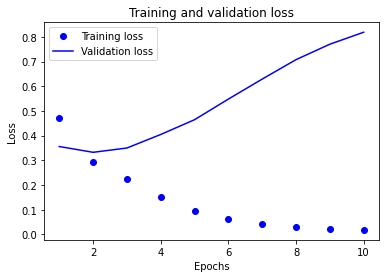

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

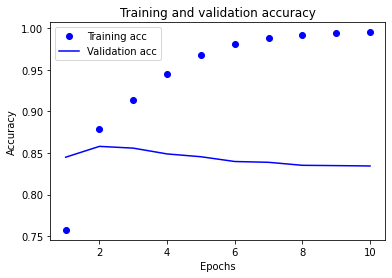

In [27]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 4-3) GlobalMaxPooling1D

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         3000000   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 808       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 3,000,817
Trainable params: 3,000,817
Non-trainable params: 0
_________________________________________________________________


In [29]:
# validation set 10000건 분리
x_val = x_train[:30000]   
y_val = y_train[:30000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[30000:]  
partial_y_train = y_train[30000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(116182, 41)
(116182,)


In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
227/227 [==============================] - 2s 5ms/step - loss: 0.4972 - accuracy: 0.8018 - val_loss: 0.3598 - val_accuracy: 0.8428
Epoch 2/10
227/227 [==============================] - 1s 4ms/step - loss: 0.3162 - accuracy: 0.8683 - val_loss: 0.3357 - val_accuracy: 0.8541
Epoch 3/10
227/227 [==============================] - 1s 5ms/step - loss: 0.2552 - accuracy: 0.8987 - val_loss: 0.3394 - val_accuracy: 0.8547
Epoch 4/10
227/227 [==============================] - 1s 4ms/step - loss: 0.2059 - accuracy: 0.9230 - val_loss: 0.3561 - val_accuracy: 0.8533
Epoch 5/10
227/227 [==============================] - 1s 5ms/step - loss: 0.1627 - accuracy: 0.9428 - val_loss: 0.3845 - val_accuracy: 0.8504
Epoch 6/10
227/227 [==============================] - 1s 4ms/step - loss: 0.1256 - accuracy: 0.9589 - val_loss: 0.4141 - val_accuracy: 0.8483
Epoch 7/10
227/227 [==============================] - 1s 4ms/step - loss: 0.0949 - accuracy: 0.9716 - val_loss: 0.4529 - val_accuracy: 0.8444
Epoch 

In [31]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.5814 - accuracy: 0.8315
[0.5814499855041504, 0.8314787149429321]


In [32]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


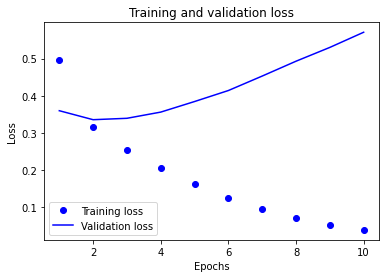

In [33]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

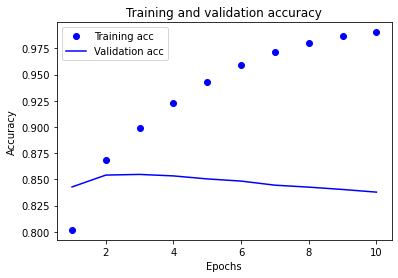

In [34]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 7) 학습된 Embedding 레이어 분석

In [35]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(30000, 100)


In [36]:
import os

word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'

f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size - 4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [37]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['컴퓨터']
vector

array([-0.05032874,  0.05329144, -0.0277403 , -0.02727539,  0.07948537,
       -0.0744825 ,  0.0084655 , -0.00287598, -0.07350252,  0.00551594,
       -0.01131499, -0.0319566 , -0.00764228, -0.03718168,  0.01562806,
       -0.01542637, -0.03021115,  0.00569084, -0.04773142, -0.01475341,
        0.00443677,  0.02217286, -0.04953847, -0.0777108 , -0.03209597,
       -0.01050318, -0.0495627 , -0.08309001,  0.10463989, -0.02612757,
        0.03393799, -0.00962312, -0.00997368, -0.047083  , -0.05391133,
       -0.06321786, -0.05416057, -0.03992585, -0.05798177, -0.05001811,
       -0.02380314, -0.00371702,  0.08016778,  0.03856718,  0.09037741,
       -0.0396807 , -0.01869805, -0.03140326, -0.04773085,  0.02878685,
       -0.01828407, -0.07482717, -0.06678886,  0.00989217, -0.05764243,
       -0.09805034,  0.00431191,  0.00655185,  0.0099288 ,  0.01165922,
        0.02721193, -0.05734602, -0.08382171, -0.06886888, -0.03989734,
       -0.01863148,  0.01228783, -0.03304994, -0.01758499, -0.04

In [38]:
word_vectors.similar_by_word("컴퓨터")

[('그리', 0.5267488956451416),
 ('뭐', 0.5257080793380737),
 ('답', 0.5251296758651733),
 ('법칙', 0.4958049952983856),
 ('다', 0.49270686507225037),
 ('/', 0.4892420768737793),
 ('드라마', 0.4879617691040039),
 ('이게', 0.48636236786842346),
 ('더만', 0.48302242159843445),
 ('아닌', 0.47666168212890625)]

In [39]:
word_vectors.similar_by_word("사랑")

[('순수', 0.6737930774688721),
 ('보', 0.620333731174469),
 ('죠', 0.6177200675010681),
 ('무조건', 0.615553617477417),
 ('마다', 0.6130632758140564),
 ('기억', 0.6059813499450684),
 ('인도', 0.6057409644126892),
 ('던데', 0.5962657332420349),
 ('감성', 0.5956190228462219),
 ('되', 0.5938745141029358)]

### 8) 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [40]:
# from gensim.models.keyedvectors import Word2VecKeyedVectors
# 한국어 Word2Vec 임베딩 활용한 성능 개

word2vec_file_path = os.getenv('HOME')+'/data/word2vec_ko.model'
word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)

vector = word_vectors.wv['끝']
vector

array([ 1.038851  , -1.1634965 ,  2.2386286 ,  0.8971453 , -2.088168  ,
       -4.1942534 , -0.02519768, -0.69813883, -0.2908033 , -1.4651134 ,
       -2.6863668 ,  0.7999443 , -0.6957915 , -0.5018775 ,  3.5025773 ,
        0.21326113, -0.6588098 , -1.1900496 ,  0.61399573,  2.1247969 ,
        0.1549463 ,  3.0840218 ,  3.1680267 , -3.9143991 ,  3.6073153 ,
        0.5315545 , -0.3511633 , -1.107248  ,  1.7767181 , -0.95981866,
        2.6072454 , -0.00697957, -3.27628   ,  1.558644  ,  0.81922376,
        1.9231955 ,  3.7026553 , -0.53824735, -0.4920138 ,  2.4657123 ,
       -2.620749  , -0.08950733,  0.61453176,  1.8866426 ,  0.257866  ,
       -2.7827141 ,  2.9129577 , -0.6313133 ,  2.0387425 , -4.222685  ,
       -2.7560544 ,  1.7903243 , -1.3080189 , -2.5531402 , -0.43849912,
       -3.1073573 , -0.29090825,  5.1817617 ,  1.9604833 , -5.1421604 ,
       -0.71431434,  4.5624633 , -0.55525815, -3.3019137 ,  1.6761336 ,
       -1.9606539 , -0.2726863 ,  0.2465995 ,  1.2685091 ,  1.60

In [41]:
word_vectors.wv.similar_by_word("끝")

[('마지막', 0.6325399875640869),
 ('결판', 0.5526015758514404),
 ('발목', 0.5465342402458191),
 ('산산조각', 0.5418900847434998),
 ('막바지', 0.5412753820419312),
 ('싫증', 0.5256820917129517),
 ('양쪽', 0.5253474116325378),
 ('무릎', 0.5246764421463013),
 ('후', 0.5051813721656799),
 ('이어진', 0.5038793087005615)]

In [42]:
word_vectors.wv.similar_by_word("컴퓨터")

[('하드웨어', 0.806628942489624),
 ('소프트웨어', 0.7847487330436707),
 ('컴퓨팅', 0.7836830019950867),
 ('노트북', 0.7603618502616882),
 ('가상현실', 0.7591529488563538),
 ('그래픽스', 0.7564041614532471),
 ('메인프레임', 0.7557739019393921),
 ('PC', 0.7514778971672058),
 ('인공지능', 0.7492970824241638),
 ('프린터', 0.7475006580352783)]

In [43]:
word_vectors.wv.similar_by_word("사랑")

[('이별', 0.7626414895057678),
 ('행복', 0.7550068497657776),
 ('슬픔', 0.7381505966186523),
 ('유혹', 0.7238055467605591),
 ('그리움', 0.7167419195175171),
 ('추억', 0.7143999338150024),
 ('꿈', 0.7089294195175171),
 ('애정', 0.7066588997840881),
 ('포옹', 0.7034594416618347),
 ('마음', 0.6972615718841553)]

In [44]:
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

for i in range(4, vocab_size):
    if index_to_word[i] in word_vectors.wv:
        embedding_matrix[i] = word_vectors.wv[index_to_word[i]]

In [45]:
from tensorflow.keras.initializers import Constant

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 41, 100)           3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 16)            11216     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [46]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
227/227 [==============================] - 2s 7ms/step - loss: 0.6109 - accuracy: 0.6469 - val_loss: 0.5067 - val_accuracy: 0.7560
Epoch 2/20
227/227 [==============================] - 1s 6ms/step - loss: 0.4551 - accuracy: 0.7889 - val_loss: 0.4251 - val_accuracy: 0.8062
Epoch 3/20
227/227 [==============================] - 1s 6ms/step - loss: 0.3886 - accuracy: 0.8277 - val_loss: 0.3875 - val_accuracy: 0.8270
Epoch 4/20
227/227 [==============================] - 1s 6ms/step - loss: 0.3471 - accuracy: 0.8503 - val_loss: 0.3719 - val_accuracy: 0.8339
Epoch 5/20
227/227 [==============================] - 1s 6ms/step - loss: 0.3160 - accuracy: 0.8662 - val_loss: 0.3636 - val_accuracy: 0.8390
Epoch 6/20
227/227 [==============================] - 1s 6ms/step - loss: 0.2919 - accuracy: 0.8789 - val_loss: 0.3583 - val_accuracy: 0.8437
Epoch 7/20
227/227 [==============================] - 1s 6ms/step - loss: 0.2708 - accuracy: 0.8902 - val_loss: 0.3613 - val_accuracy: 0.8423
Epoch 

In [47]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.6253 - accuracy: 0.8291
[0.625323474407196, 0.8291392922401428]


In [48]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


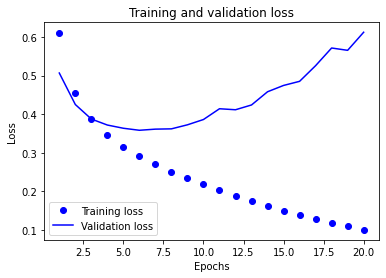

In [49]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

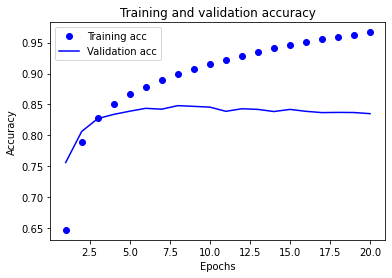

In [50]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---
# 회고

---

Naver sentiment movie corpus v1.0 에서,<br>
 ratings_train.txt는 15만 건,<br>
 ratings_test.txt는 5만 건의 댓글이 있었고, 모두 라벨링이 된 상태였다.<br>
<br>
댓글과 Label 을 비교하면서 대충 보아도,<br>
0 이면 부정, 1이면 긍정임을 알 수 있었다.<br>
<br>
하지만, 댓글과 label 이 일치하지 않는 경우가 자주 발견되어,<br>
label의 신뢰성은 어느 정도인지 확신할 수는 없었다.<br>

이번 장에서는, 텍스트 처리에서,<br>
LSTM 뿐 아니라, CNN, 심지어 GlobalMaxPooling 하나만 사용하여도 효과가 있음을 확인하였다.<br>
<br>
전체적으로 LSTM이 소폭 앞서기는 하지만, 큰 차이는 아니었으면,<br>
LSTM, CNN, GlobalMaxPooling 모두 대체로,<br>
epoch 가 2~3회째 가장 높은 accuracy 와 낮은 loss 를 보였고,<br>
이후부터는 학습을 하면 할수록,<br>
training data에만 과대적합 되어, training data의 loss는 감소하고, accuracy는 증가하였지만,<br>
validation data는 loss가 증가하고, accuracy는 감소하였다.<br>

위 3가지 모델은 대체로 비슷한 결과를 보여주었으며,<br>
어휘사전을 1만개에서 3만개로 해보고,<br>
validation data를 1만개에서 3만개로 증가해 보았으나,<br>
epoch 2~3회에서 accuracy 85%가 한계로, 이후부터는 training data에만 과대적합 될 뿐이었다.<br>

이미 학습된 word2vec_ko.model 을 사용하라고 하여,<br>
이를 사용해보니, 워드 벡터의 차원수는 100차원로 생각되며,<br>
Word2Vec 처럼 300차원의 벡터로 지정하여 테스트 할 수는 없었지만,<br>
similar_by_word 를 사용해 보면, 이전과 확연하게 뛰어난 유사단어를 보여주어,<br>
큰 성능 향상을 기대하였으나,<br>
오히려 앞의 3개 모델 보다도 소폭 떨어지는 결과를 보여주었습니다.<br>

따라서, 내린 결론은,<br>
label이 85% 수준의 accuracy를 낼 수 밖에 없게 되어 있다.<br>
15% 정도는 label이 잘못되었거나, 판정할 수 없는 경우로 추측해 봅니다.<br>